In [17]:
import numpy as np
import pandas as pd

# Output Feature :- FWI (For Regression), Class (For Classification)
dataset = pd.read_csv('./datasets/algerian-forest-fires.csv')
dataset.head()

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [18]:
# remove duplicates
dataset = dataset.drop_duplicates()

In [19]:
# remove null values
print('Records with Null Values:', dataset[dataset.isna().any(axis = 1)].__len__())
dataset = dataset[dataset.notna().all(axis = 1)]
print('Null Values Removed\n')

print(dataset.info())
dataset.head()

Records with Null Values: 3
Null Values Removed

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   WS           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB
None


,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [20]:
# Preprocessing and Cleaning

print(dataset['day'].unique())
dataset[dataset['day'] == 'day']

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' 'day']


,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [21]:
# Removing invalid rows and resetting index
dataset.drop(124, axis = 0, inplace = True)
dataset.reset_index(drop = True, inplace = True)
print(dataset['day'].unique())

# converting into int
dataset['day'] = dataset['day'].astype('int16')
print()
dataset.info()

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int16 
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   WS           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: int16(1), object(13)
memory usage: 25.3+ KB


In [22]:
# Correct the datatypes

dataset[['month', 'year', 'Temperature', 'RH', 'WS']] = dataset[['month', 'year', 'Temperature', 'RH', 'WS']].astype('int16')
dataset[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = dataset[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float32')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int16  
 1   month        243 non-null    int16  
 2   year         243 non-null    int16  
 3   Temperature  243 non-null    int16  
 4   RH           243 non-null    int16  
 5   WS           243 non-null    int16  
 6   Rain         243 non-null    float32
 7   FFMC         243 non-null    float32
 8   DMC          243 non-null    float32
 9   DC           243 non-null    float32
 10  ISI          243 non-null    float32
 11  BUI          243 non-null    float32
 12  FWI          243 non-null    float32
 13  Classes      243 non-null    object 
dtypes: float32(7), int16(6), object(1)
memory usage: 11.5+ KB


In [23]:
print(dataset['Classes'].unique())
dataset['Classes'] = dataset['Classes'].str.strip(' ')
print(dataset['Classes'].unique())

# normalize output feature into binary class
dataset.rename({'Classes': 'Fire'}, axis = 1, inplace = True)
dataset['Fire'] = dataset['Fire'].str.replace('not fire', '0')
dataset['Fire'] = dataset['Fire'].str.replace('fire', '1')
dataset['Fire'] = dataset['Fire'].astype('int')
print(dataset['Fire'].unique())
print()
dataset.info()

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
['not fire' 'fire']
[0 1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int16  
 1   month        243 non-null    int16  
 2   year         243 non-null    int16  
 3   Temperature  243 non-null    int16  
 4   RH           243 non-null    int16  
 5   WS           243 non-null    int16  
 6   Rain         243 non-null    float32
 7   FFMC         243 non-null    float32
 8   DMC          243 non-null    float32
 9   DC           243 non-null    float32
 10  ISI          243 non-null    float32
 11  BUI          243 non-null    float32
 12  FWI          243 non-null    float32
 13  Fire         243 non-null    int64  
dtypes: float32(7), int16(6), int64(1)
memory usage: 11.5 KB


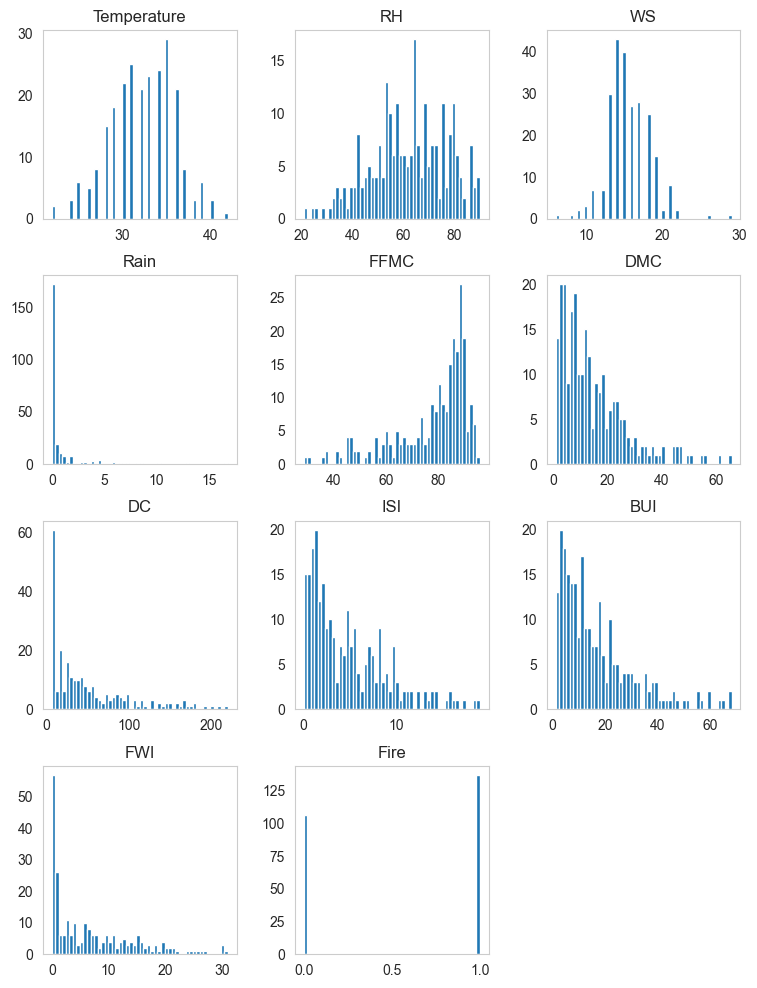

In [24]:
# EDA

# Density Plot for Each Feature
import seaborn as sns
import matplotlib.pyplot as plotter
dataset.iloc[:,3:].hist(bins = 50, grid = False, figsize = (9, 12))
plotter.show()

<Axes: >

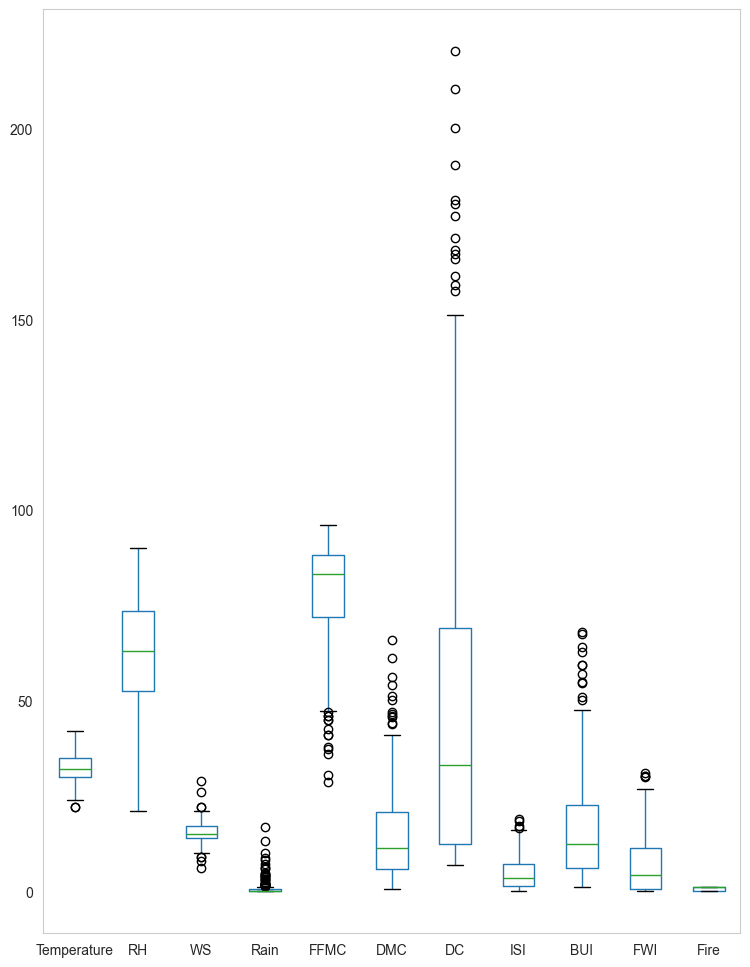

In [25]:
# Box Plot for each feature (for checking outliers)
dataset.iloc[:,3:].boxplot(grid = False, figsize = (9, 12))

Text(0.5, 1.0, 'Monthly Fire Analysis')

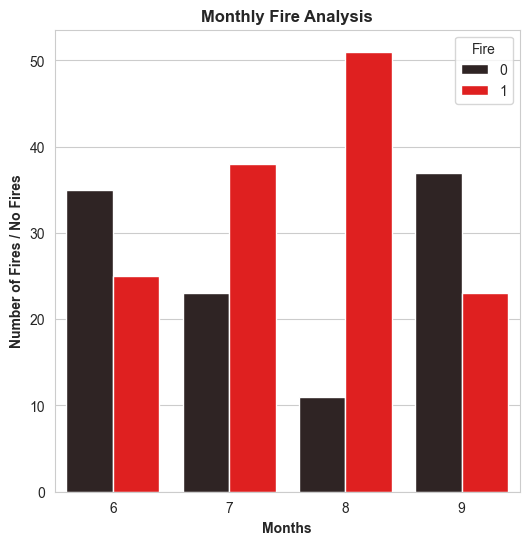

In [26]:
# Monthly Fires Analysis
plotter.figure(figsize = (6,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Fire', data = dataset, palette='dark:red')
plotter.ylabel('Number of Fires / No Fires', weight = 'bold')
plotter.xlabel('Months', weight = 'bold')
plotter.title('Monthly Fire Analysis', weight = 'bold')

<Axes: >

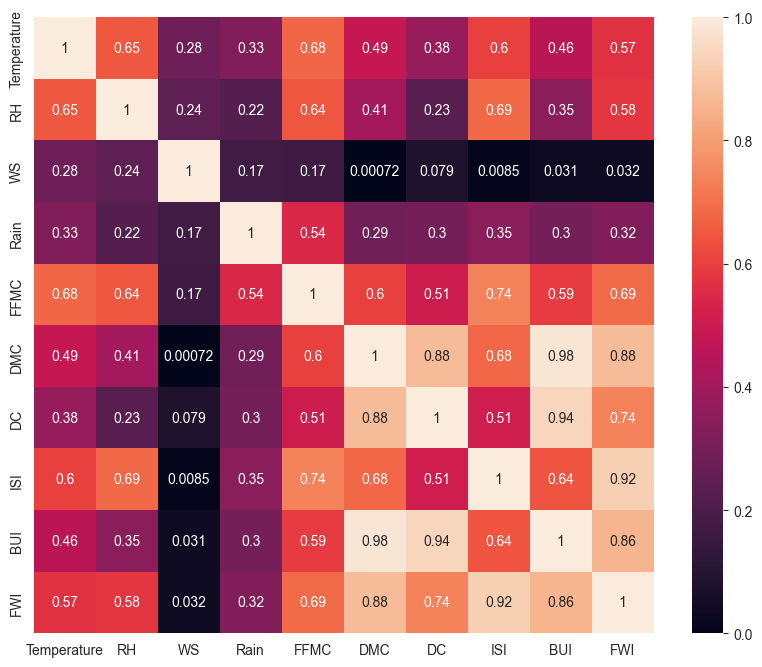

In [27]:
# Checking for correlation

plotter.figure(figsize = (10, 8))
sns.heatmap(dataset.iloc[:,3:-1].corr(numeric_only = True).abs(), vmin = 0, vmax = 1, annot = True)

In [28]:
# Remove irrelevant features and save the cleaned dataset
dataset.drop(['day', 'month', 'year'], inplace = True, axis = 1)
dataset.to_csv('./datasets/algerian-forest-fires-cleaned.csv', index = False)